# Regression analysis on NOAA's Storm Event database

This python code is written to read NOAA's storm event database
It creates a dataframe from the list of .csv files and allows the user to investigate how many times a particular type of event happened in the past (Number of events per year) starting from 1950 to 2017

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading a list of names for the text files containing storm event data
txtfile = open("flist.txt")
flist = txtfile.read().split('\n')
flist=flist[:-1]
flist

['StormEvents_details-ftp_v1.0_d1950_c20170120.csv',
 'StormEvents_details-ftp_v1.0_d1951_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1952_c20170619.csv',
 'StormEvents_details-ftp_v1.0_d1953_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1954_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1955_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1956_c20170717.csv',
 'StormEvents_details-ftp_v1.0_d1957_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1958_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1959_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1960_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1961_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1962_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1963_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1964_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1965_c20170619.csv',
 'StormEvents_details-ftp_v1.0_d1966_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1967_c20160223.csv',
 'StormEvents_details-ftp_v1.0_d1968_c20160223

In [3]:
#Enter the event type you would like to investigate
events = input("Please enter your the event of interest: ")

Please enter your the event of interest: Tornado


In [4]:
#The event entered will be stored in a dictionary
vlist = [events]

In [5]:
#Composing a dictionary with the names of the lower 48 States
slist = ['ALABAMA',
'ARIZONA',
'ARKANSAS',
'CALIFORNIA',
'COLORADO',
'CONNECTICUT',
'DELAWARE',
'FLORIDA',
'GEORGIA',
'IDAHO',
'ILLINOIS',
'INDIANA',
'IOWA',
'KANSAS',
'KENTUCKY',
'LOUISIANA',
'MAINE',
'MARYLAND',
'MASSACHUSETTS',
'MICHIGAN',
'MINNESOTA',
'MISSISSIPPI',
'MISSOURI',
'MONTANA',
'NEBRASKA',
'NEVADA',
'NEW HAMPSHIRE',
'NEW JERSEY',
'NEW MEXICO',
'NEW YORK',
'NORTH CAROLINA',
'NORTH DAKOTA',
'OHIO',
'OKLAHOMA',
'OREGON',
'PENNSYLVANIA',
'RHODE ISLAND',
'SOUTH CAROLINA',
'SOUTH DAKOTA',
'TENNESSEE',
'TEXAS',
'UTAH',
'VERMONT',
'VIRGINIA',
'WASHINGTON',
'WEST VIRGINIA',
'WISCONSIN',
'WYOMING']

In [6]:
#Only two columns are needed from the data for this investigation
f = ['STATE','EVENT_TYPE']

In [7]:
#For loop to generate a dataframe with data from all csv files
i=0
for file in flist:
	df=pd.read_csv(file, usecols=f)
	df=df[df['EVENT_TYPE'].isin(vlist)]
	df=df[df['STATE'].isin(slist)]
	df=df.groupby(['STATE']).count()
	df.columns=[file[30:34]]
	for j in range(0,47):
		if slist[j] not in df.index:
			dftemp = pd.DataFrame([0], columns=[file[30:34]], index=[slist[j]])
			df=pd.concat([df, dftemp])
	df=df.sort_index()
	if i==0:
		full=df
	else:
		full=full.join(df,  how='outer')
	i+=1


In [8]:
#Dataframe containing the amount of events from 1950 to 2017
full.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
ALABAMA,2,5.0,13,22,10,8,7,51,23,9,...,112,91,46,217,67,28,67,35,76,48
ARIZONA,0,0.0,1,0,2,1,3,5,4,2,...,3,4,12,3,1,1,3,5,1,2
ARKANSAS,13,3.0,29,11,33,28,17,28,7,12,...,110,59,47,104,23,41,25,21,28,40
CALIFORNIA,0,1.0,1,2,1,3,2,1,10,1,...,7,2,9,9,12,5,9,10,5,3
COLORADO,3,8.0,3,14,9,19,10,26,18,1,...,40,46,71,21,34,27,50,57,39,13


In [9]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

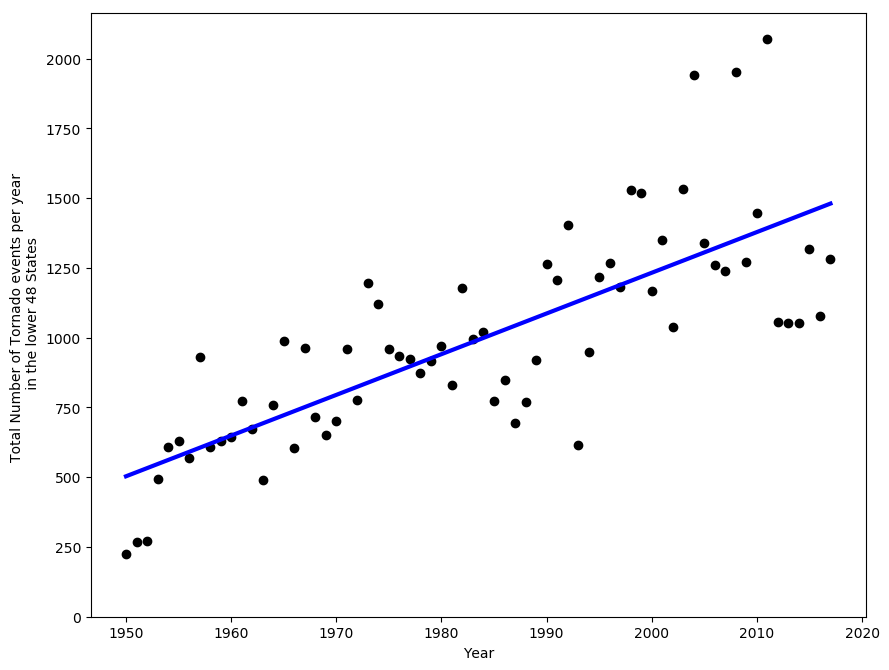

In [10]:
#Plot the data and fit a linear regression
regr = linear_model.LinearRegression()
x=list(range(1950,2017+1))
y=full.sum().astype(int)
x=np.asarray(x)
y=np.asarray(y)
x=x.reshape(-1,1)
y=y.reshape(-1,1)
regr.fit(x, y)
y_pred = regr.predict(x)
var=np.mean((y-y_pred)**2)
fig = plt.figure(figsize=(10,8), dpi=100)
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Total Number of '+events+' events per year \n in the lower 48 States')
plt.ylim(ymin=0)
plt.show()

In [11]:
#Coefficient of determination of the fitted line
print('Coefficient of determination : %.2f' % r2_score(y, y_pred))

Coefficient of determination : 0.59
